In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
from scipy import stats
import sys
sys.path.append('..')
from madule import simulation
from madule import plots
from statsmodels.stats.anova import AnovaRM

In [24]:
# read collected data across data
dataAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')


In [43]:
"""Split up the data into conidtion-dependent data and then define new column for the maximum winning value
Calculate maximum across Color and Action winning Values seperately"""
dataAll['chosenWinAmt'] = (dataAll['leftChosen']*dataAll['winAmtLeft'] + (1-dataAll['leftChosen'])*(dataAll['winAmtRight'])).astype(int)

In [26]:
"""Choice Proportion and RT in Group 2"""
# Save concatenated data over group lable 2
dataAllGroup2 = dataAll.loc[dataAll['group']==2]


In [27]:
# Repeated mesure ANOVA in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup2, depvar='correctChoice', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,0.6770,1.0000,23.0000,0.4191
block,0.0076,1.0000,23.0000,0.9314
session:block,0.7590,1.0000,23.0000,0.3927


In [18]:
# Repeated mesure ANOVA in responce time
aovrm2way = AnovaRM(data = dataAllGroup2, depvar='RT', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,5.1639,1.0000,23.0000,0.0327
block,0.1651,1.0000,23.0000,0.6882
session:block,0.3038,1.0000,23.0000,0.5868


In [44]:
"""Choice Proportion and RT in Groups 1 and 3"""
dataAllGroup13 = dataAll.loc[(dataAll['group']==1) | (dataAll['group']==3)]
dataAllGroup13.to_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/dataAllGroup13.csv', index=False)

In [45]:
# Repeated mesure ANOVA across session in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='correctChoice', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,2.1111,1.0000,21.0000,0.1610
block,2.9359,1.0000,21.0000,0.1014
session:block,0.0143,1.0000,21.0000,0.9059


In [26]:
# Repeated mesure ANOVA across session in response time
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='RT', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,26.6830,1.0000,21.0000,0.0000
block,0.1958,1.0000,21.0000,0.6626
session:block,3.1951,1.0000,21.0000,0.0883


In [28]:
# Repeated mesure ANOVA across group in response time
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='RT', subject = 'sub_ID',
                    within=['group','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
group,0.0754,1.0000,21.0000,0.7863
block,0.1958,1.0000,21.0000,0.6626
group:block,3.4768,1.0000,21.0000,0.0763


In [29]:
dataAllGroup2.groupby(['session', 'block'], as_index=False)['correctChoice', 'RT'].mean()

/tmp/ipykernel_206546/881196541.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllGroup2.groupby(['session', 'block'], as_index=False)['correctChoice', 'RT'].mean()


,session,block,correctChoice,RT
0,1,Act,0.499738,1.536807
1,1,Stim,0.491256,1.532819
2,2,Act,0.487581,1.465813
3,2,Stim,0.493333,1.439609


In [30]:
dataAllGroup13.groupby(['group', 'block'], as_index=False)['correctChoice', 'RT'].mean()

/tmp/ipykernel_206546/2454123967.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllGroup13.groupby(['group', 'block'], as_index=False)['correctChoice', 'RT'].mean()


,group,block,correctChoice,RT
0,1,Act,0.500290,1.550630
1,1,Stim,0.502326,1.496904
2,3,Act,0.498258,1.516912
3,3,Stim,0.478914,1.538932


In [29]:
""" Scatter plots for proportion of correct choice and RT in each group"""
dataAllMean = dataAll.groupby(['sub_ID', 'group'], as_index=False)['correctChoice', 'RT'].mean()

/tmp/ipykernel_1097166/2881906800.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllMean = dataAll.groupby(['sub_ID', 'group'], as_index=False)['correctChoice', 'RT'].mean()


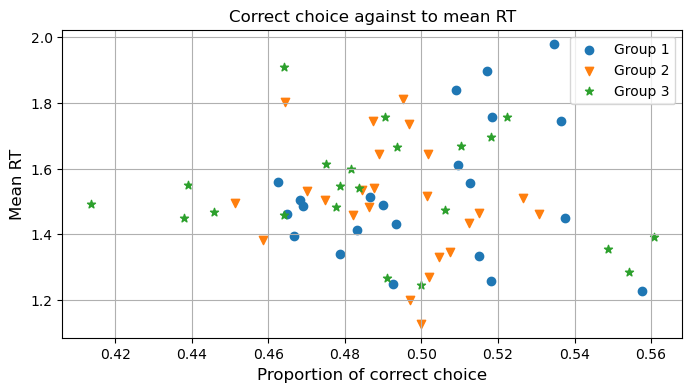

In [34]:
plt.figure(figsize=(8, 4))
markers = ['o', 'v', '*']
groups = [1, 2, 3]
for g, m in zip(groups, markers):
    plt.scatter(dataAllMean.loc[dataAllMean['group']==g]['correctChoice'], 
                dataAllMean.loc[dataAllMean['group']==g]['RT'], marker=m)
plt.legend(['Group 1', 'Group 2', 'Group 3'])
plt.xlabel('Proportion of correct choice', size=12)
plt.ylabel('Mean RT', size=12)
plt.title('Correct choice against to mean RT', size=12)
plt.grid()
plt.show()

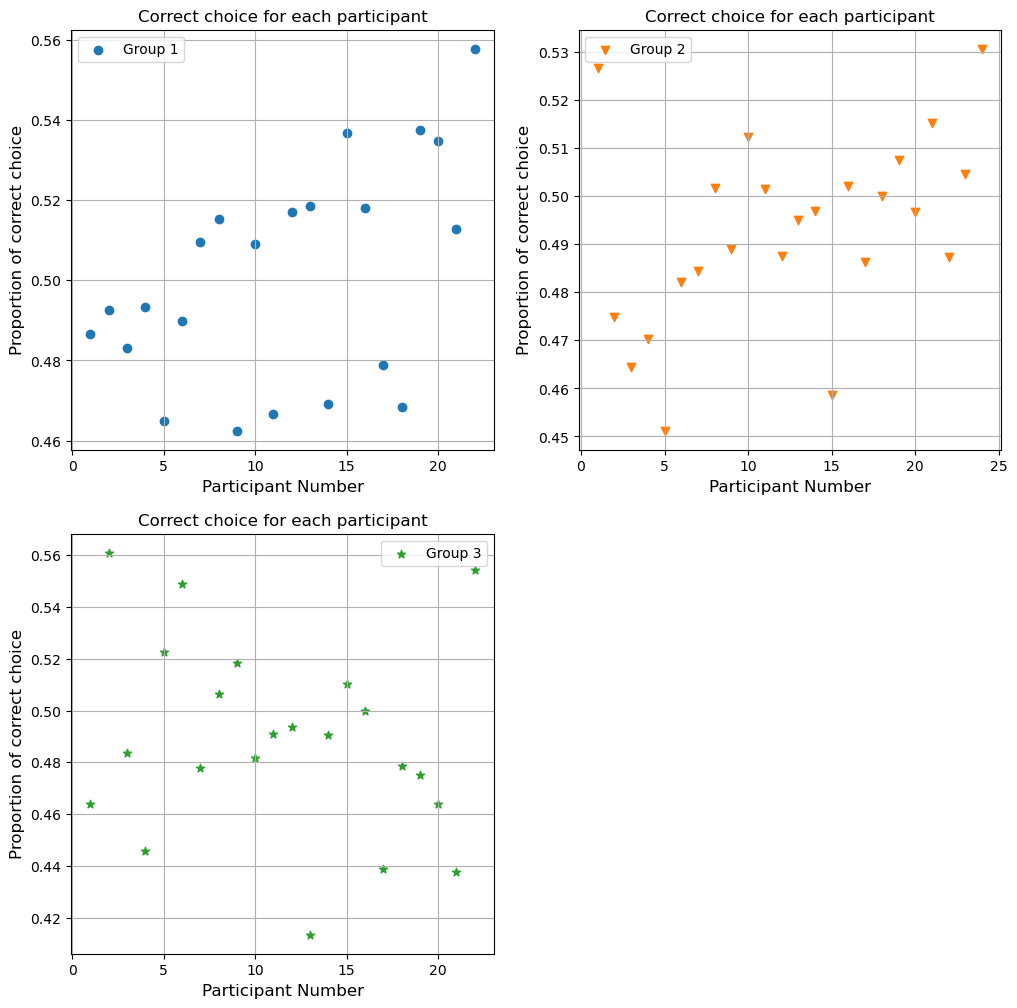

In [37]:
fig = plt.figure(figsize=(12, 12))
markers = ['o', 'v', '*']
groups = [1, 2, 3]
labels = [['Group 1'], ['Group 2'], ['Group 3']]
colors = [['#1f77b4'], ['#ff7f0e'], ['#2ca02c']]
for g, m, l, c in zip(groups, markers, labels, colors):
    fig.add_subplot(2, 2, g)
    x = np.linspace(1, len(dataAllMean.loc[dataAllMean['group']==g]), 
                    num=len(dataAllMean.loc[dataAllMean['group']==g])).astype(int)
    plt.scatter(x, dataAllMean.loc[dataAllMean['group']==g]['correctChoice'] ,marker=m, c=c)
    plt.xlabel('Participant Number', size=12)
    plt.ylabel('Proportion of correct choice', size=12)
    plt.title('Correct choice for each participant', size=12)
    plt.grid()
    plt.legend(l)
plt.show()

In [74]:
""" Bar plots for proportion of correct choice and RT in each group"""


' Bar plots for proportion of correct choice and RT in each group'

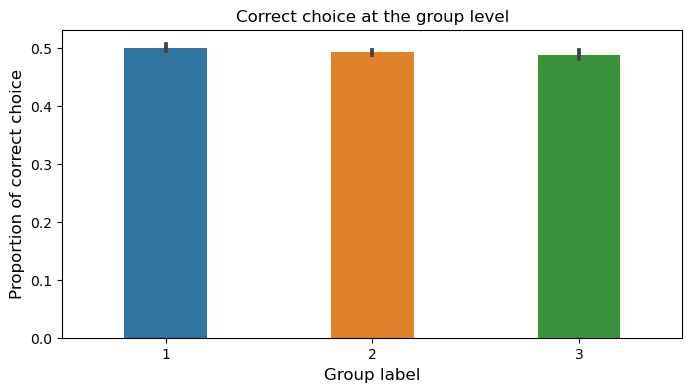

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(x='group',y='correctChoice', data=dataAllMean, errorbar='se', width=.4)
plt.xlabel('Group label', size=12)
plt.ylabel('Proportion of correct choice', size=12)
plt.title('Correct choice at the group level', size=12)
plt.show()

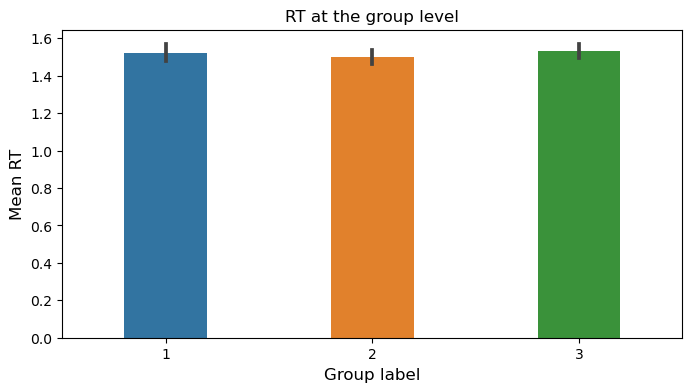

In [39]:
plt.figure(figsize=(8, 4))
sns.barplot(x='group',y='RT', data=dataAllMean, errorbar='se', width=.4)
plt.xlabel('Group label', size=12)
plt.ylabel('Mean RT', size=12)
plt.title('RT at the group level', size=12)
plt.show()

/tmp/ipykernel_1097166/1797179858.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllBlock = dataAll.groupby(['sub_ID', 'group', 'block'], as_index=False)['correctChoice', 'RT'].mean()


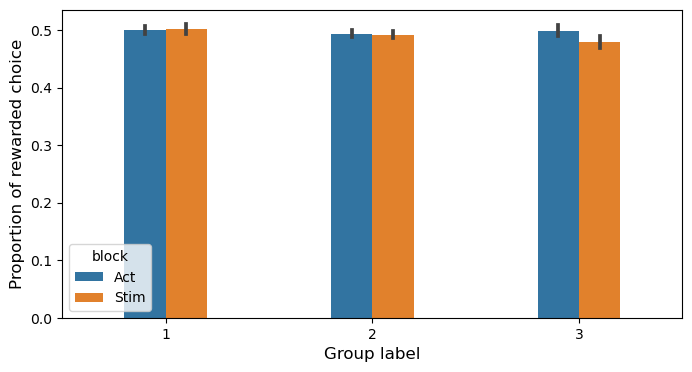

In [40]:
dataAllBlock = dataAll.groupby(['sub_ID', 'group', 'block'], as_index=False)['correctChoice', 'RT'].mean()

plt.figure(figsize=(8, 4))
markers = ['o', 'v', '*']
groups = ['1', '2', '3']
sns.barplot(x='group',y='correctChoice', data=dataAllBlock, hue='block', errorbar='se', width=.4)
plt.xlabel('Group label', size=12)
plt.ylabel('Proportion of rewarded choice', size=12)
plt.savefig('rewarded_choice.png' , dpi=300)


/tmp/ipykernel_1097166/525239423.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllBlockGroup2 = (dataAll.loc[dataAll['group']==2]).groupby(['sub_ID', 'block', 'session'], as_index=False)['correctChoice', 'RT'].mean()


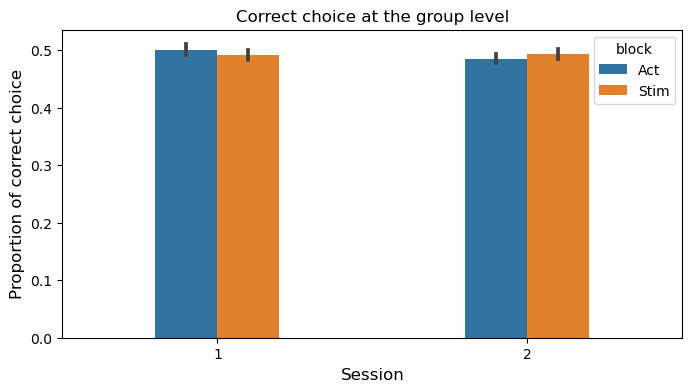

In [41]:
dataAllBlockGroup2 = (dataAll.loc[dataAll['group']==2]).groupby(['sub_ID', 'block', 'session'], as_index=False)['correctChoice', 'RT'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x='session',y='correctChoice', data=dataAllBlockGroup2, hue='block', errorbar='se', width=.4)
plt.xlabel('Session', size=12)
plt.ylabel('Proportion of correct choice', size=12)
plt.title('Correct choice at the group level', size=12)
plt.show()

/tmp/ipykernel_1097166/2944649069.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataAllBlockGroup13 = (dataAll.loc[dataAll['group']!='2']).groupby(['sub_ID', 'block', 'group'], as_index=False)['correctChoice', 'RT'].mean()


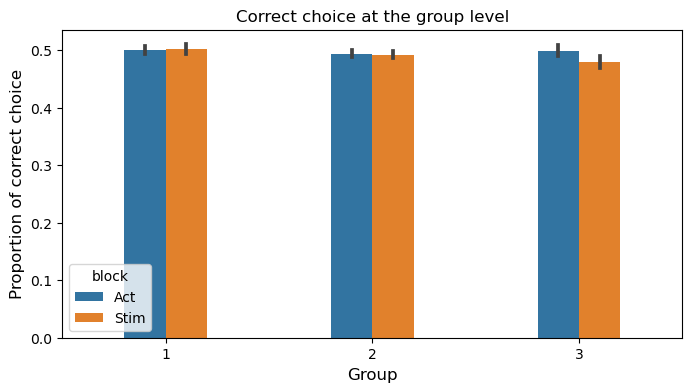

In [42]:
dataAllBlockGroup13 = (dataAll.loc[dataAll['group']!='2']).groupby(['sub_ID', 'block', 'group'], as_index=False)['correctChoice', 'RT'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x='group',y='correctChoice', data=dataAllBlockGroup13, hue='block', errorbar='se', width=.4)
plt.xlabel('Group', size=12)
plt.ylabel('Proportion of correct choice', size=12)
plt.title('Correct choice at the group level', size=12)
plt.show()

In [7]:
# Seperate simple repersal point with complex reversal point
stats.binom_test(184, n=8*42, p=0.5, alternative='greater')

In [55]:
184/(8*42)

0.5476190476190477